# 2. "orders.csv" Data Analysis
* **orders.csv에 대한 분석**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

pd.options.mode.chained_assignment = None  # default='warn'

### Read Data

In [4]:
orders = pd.read_csv("data/orders.csv")

In [5]:
orders.head(5)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


* **order_dow** : day of week, 무슨 요일에 주문했는가, 0-6
* **order_hour_of_day** : 하루 24시간 중 몇 시에 주문했는가
* **days_since_prior_order** : 이전 주문으로부터 얼마만에 현재 주문이 이루어졌는가

## 2-1) Missing Data

In [6]:
orders_na = (orders.isnull().sum() / len(orders)) * 100
orders_na = orders_na.drop(orders_na[orders_na == 0].index).sort_values(ascending=False)
orders_na

days_since_prior_order    6.027594
dtype: float64

    ➢ orders 에는 days_since_prior_order(이전 주문으로부터 얼마만에 주문했는가)의 정보가 6.03% Missing
    ➢ 유저 별 첫 주문에 대해서는 이전 주문이 존재하지 않기에 NaN으로 처리된 듯함.

## 2-2) order_dow(day of week) : 무슨 요일에 가장 많이 주문하는가?

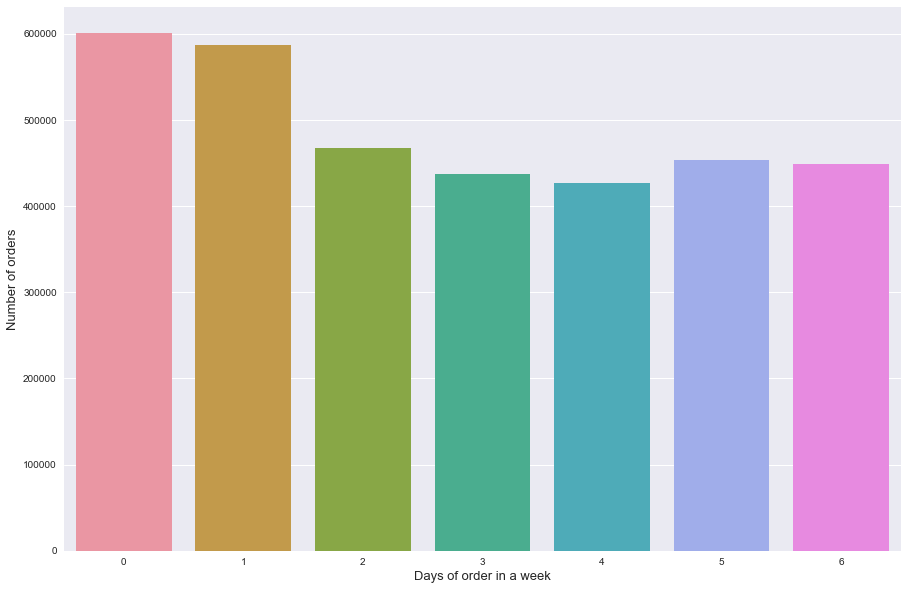

In [7]:
grouped = orders.groupby("order_id")["order_dow"].aggregate("sum").reset_index()
grouped = grouped.order_dow.value_counts()

f, ax = plt.subplots(figsize=(15, 10))
sns.barplot(grouped.index, grouped.values)
plt.ylabel('Number of orders', fontsize=13)
plt.xlabel('Days of order in a week', fontsize=13)
plt.show()

## 2-3) order_hour_of_day : 하루 중 몇 시에 가장 많이 주문하는가?

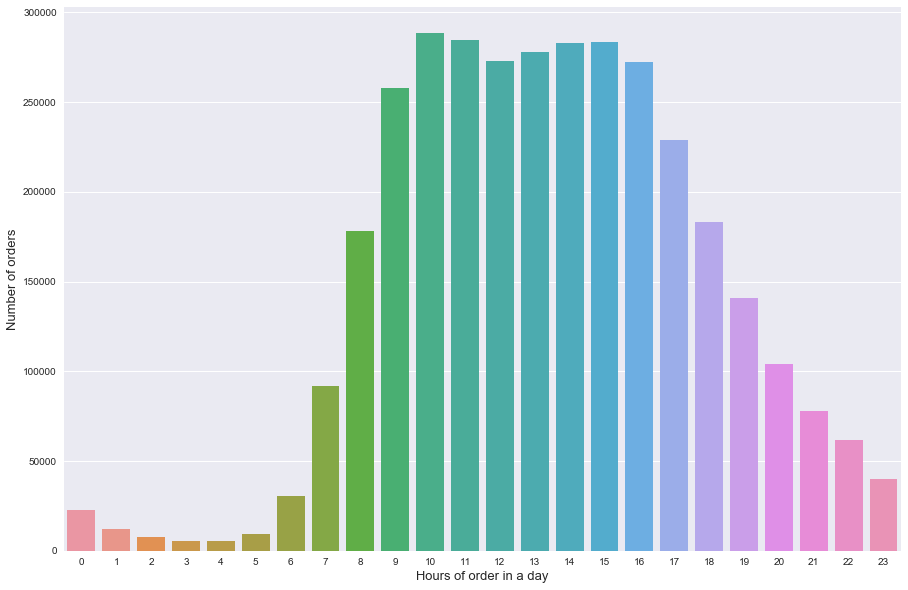

In [8]:
grouped = orders.groupby("order_id")["order_hour_of_day"].aggregate("sum").reset_index()
grouped = grouped.order_hour_of_day.value_counts()

sns.set_style('darkgrid')
f, ax = plt.subplots(figsize=(15, 10))
sns.barplot(grouped.index, grouped.values)
plt.ylabel('Number of orders', fontsize=13)
plt.xlabel('Hours of order in a day', fontsize=13)
plt.show()

## 2-4) days_since_prior_order : 이전 주문으로부터 얼마만에 현재 주문이 이루어졌는가?

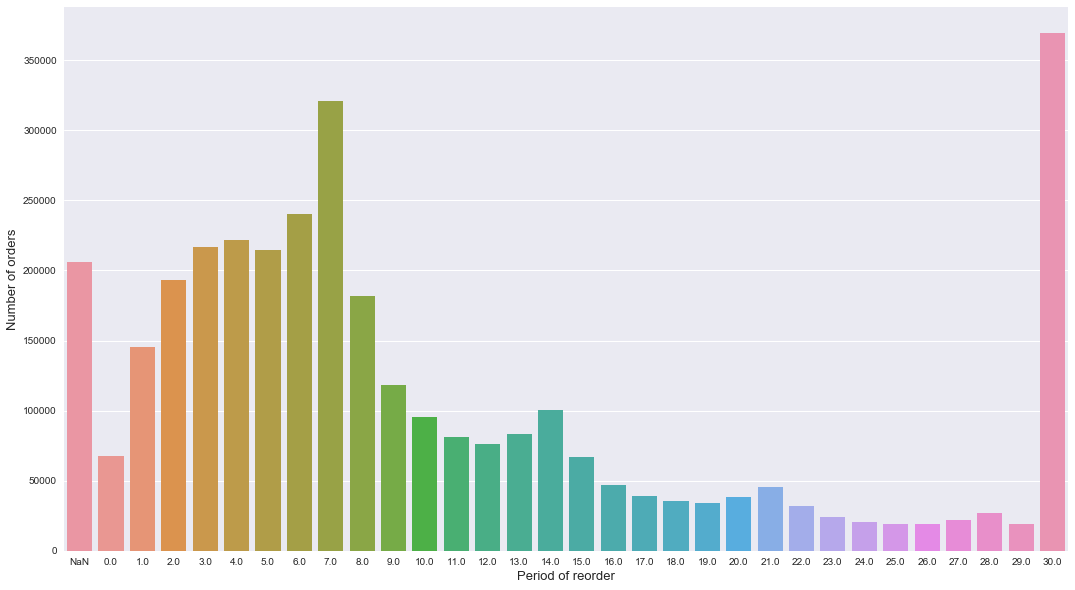

In [9]:
grouped = orders.groupby("order_id")["days_since_prior_order"].aggregate("sum").reset_index()
grouped = grouped.days_since_prior_order.value_counts().sort_index()
grouped = pd.Series([orders['days_since_prior_order'].isnull().sum()], index=['NaN']).append(grouped)

from matplotlib.ticker import FormatStrFormatter
f, ax = plt.subplots(figsize=(18, 10))
sns.barplot(grouped.index, grouped.values)
plt.ylabel('Number of orders', fontsize=13)
plt.xlabel('Period of reorder', fontsize=13)
plt.show()

    ➢ 한달에 한 번씩 정기적으로 주문을 하는 사람이 많은 듯함.

## 2-5) eval_set을 기준으로 한 orders 데이터 분포

In [10]:
grouped = orders.groupby("eval_set")["order_id"].aggregate({'Total_orders': 'count'}).reset_index()
grouped['Ratio'] = grouped["Total_orders"].apply(lambda x: x /grouped['Total_orders'].sum())
grouped

/Users/Joohong/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  if __name__ == '__main__':


,eval_set,Total_orders,Ratio
0,prior,3214874,0.939724
1,test,75000,0.021923
2,train,131209,0.038353


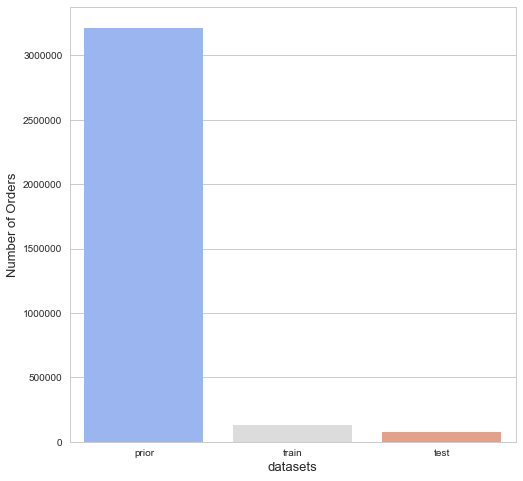

In [11]:
grouped  = grouped.groupby(['eval_set']).sum()['Total_orders'].sort_values(ascending=False)

sns.set_style('whitegrid')
f, ax = plt.subplots(figsize=(8, 8))
sns.barplot(grouped.index, grouped.values, palette='coolwarm')
plt.ylabel('Number of Orders', fontsize=13)
plt.xlabel('datasets', fontsize=13)
plt.show()

## 2-6) 각 eval_set을 구성하는 orders 중 Unique한 Customers(User)의 분포

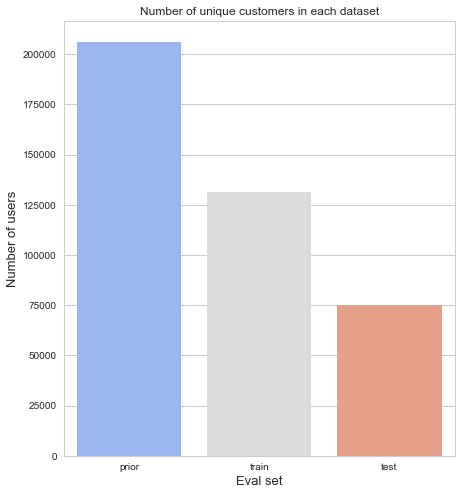

In [13]:
grouped = orders.groupby("eval_set")["user_id"].apply(lambda x: len(x.unique())).sort_values(ascending=False)

plt.figure(figsize=(7,8))
sns.barplot(grouped.index, grouped.values, palette='coolwarm')
plt.ylabel('Number of users', fontsize=13)
plt.xlabel('Eval set', fontsize=13)
plt.title("Number of unique customers in each dataset")
plt.show()

## 2-7) Customers의 주문 횟수 분포

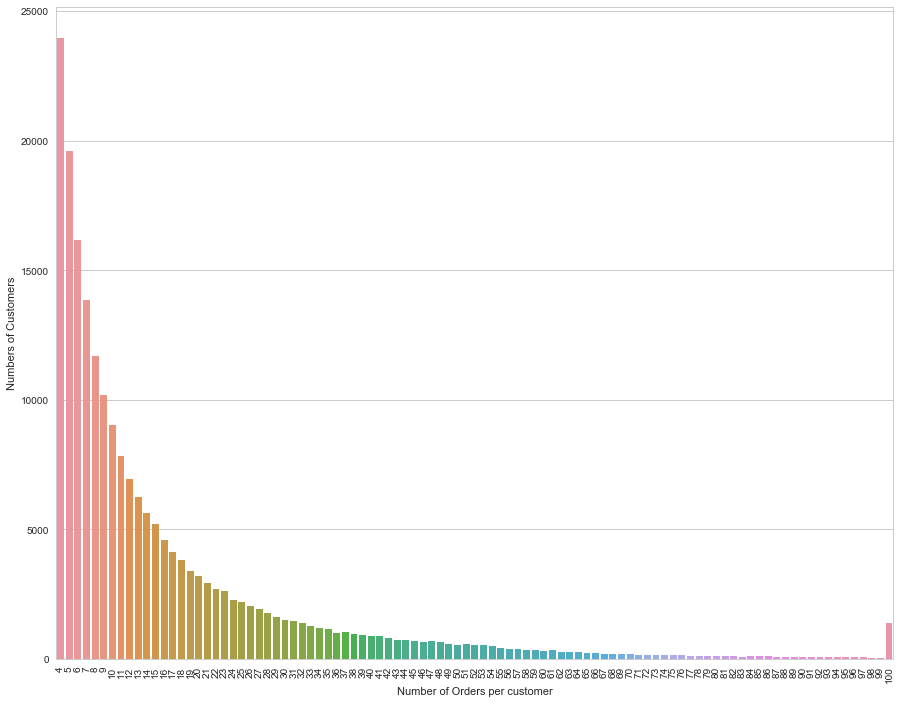

In [14]:
grouped = orders.groupby('user_id')['order_id'].apply(lambda x: len(x.unique())).reset_index()
grouped = grouped.groupby('order_id').aggregate("count")

sns.set_style("whitegrid")
f, ax = plt.subplots(figsize=(15, 12))
sns.barplot(grouped.index, grouped.user_id)
plt.ylabel('Numbers of Customers')
plt.xlabel('Number of Orders per customer')
plt.xticks(rotation='vertical')
plt.show()